# **Questão Problema**

Na fazenda Algodão Dourado, observa-se a necessidade de um sistema para classificar o algodão produzido. Os parâmetros para a análise do algodão são: comprimento das fibras, uniformidade das fibras, resistência das fibras, micronaire, maturidade, impurezas. Com base nos dados observados, será feito uma classificação de qualidade com base na nota gerada. 

Para resolver o problema, séra utilizado a Lógica Fuzzy visto que a mesma é uma teoria matemática que lida com a incerteza e imprecisão nos dados e fornece uma abordagem para modelagem de sistemas baseados em regras que envolvem tomada de decisões vagas ou incertas.


# **Em seguida, importe as bibliotecas necessárias:**

In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=109ccd029fc840dcbdc0659ded7516507836ad497abfb2718173843b11fe3a0e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


O primeiro passo é instalar a biblioteca skfuzzy. Ela oferece um conjunto abrangente de funções e ferramentas para ajudar os usuários a projetar, construir e simular sistemas de lógica fuzzy em Python. Isso inclui funções para definir variáveis linguísticas, conjuntos fuzzy e operações lógicas, bem como ferramentas para inferência, simulação e visualização.

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

A biblioteca NumPy oferece uma série de funções matemáticas para realizar operações com arrays, incluindo operações aritméticas básicas (adição, subtração, multiplicação e divisão), funções trigonométricas, exponenciais e logarítmicas, além de outras operações avançadas, como transformada de Fourier e álgebra linear.

O comando "from skfuzzy import control" diz ao Python para carregar o módulo "control" do scikit-fuzzy, que contém funções e classes para construção e simulação de sistemas de controle fuzzy. O comando "as ctrl" renomeia o módulo "control" como "ctrl", que é um apelido comum usado pelos programadores ao trabalhar com essa biblioteca.

# **Variáveis de entrada e saída:**

In [3]:
# Variáveis de entrada
comprimentodasfibras = ctrl.Antecedent(np.arange(0, 61, 1), 'cf')
uniformidadedasfibras = ctrl.Antecedent(np.arange(0, 101, 1), 'uf')
resistenciadasfibras = ctrl.Antecedent(np.arange(25, 41, 1), 'rf')
micronaire = ctrl.Antecedent(np.arange(1, 7, 0.2), 'micronaire') 
maturidade = ctrl.Antecedent(np.arange(0, 101, 1), 'maturidade') 
impurezas = ctrl.Antecedent(np.arange(0, 101, 0.5), 'impurezas') 

# Variável de saída
qualidade = ctrl.Consequent(np.arange(0, 11, 1), 'qualidade')

**Explicando Váriaveis:**

1. O comprimento da fibra do algodão pode variar bastante dependendo da variedade 
da planta, das condições climáticas e de cultivo, do processamento e de outros fatores. Em geral, o comprimento da fibra do algodão varia de cerca de 10 a 60 milímetros.
2. Valor médio de uniformidade das fibras de um algodão pode variar bastante, dependendo da qualidade do algodão. Em geral, um algodão de alta qualidade deve ter uma uniformidade das fibras acima de 80%. No entanto, para alguns usos específicos, como na produção de tecidos finos e delicados, pode ser necessário um algodão com uniformidade ainda maior, acima de 90%.
3. O valor médio de resistência das fibras do algodão pode variar de cerca de 25 a 40 g/tex, sendo que valores acima de 35 g/tex são considerados bons para a maioria das aplicações têxteis. No entanto, para aplicações que exigem alta resistência, como cordas e lonas, pode ser necessário utilizar algodão com resistência ainda maior.
4. O valor médio de micronaire pode variar bastante, dependendo da qualidade do algodão e do seu uso final. Valores abaixo de 3,5 são considerados muito finos e podem apresentar problemas no processamento, enquanto valores acima de 5,5 são considerados grossos e podem afetar a qualidade do tecido final.
5. O valor de maturidade é medido pela relação entre a força necessária para quebrar a fibra do algodão e a sua finura, e pode variar de 0 a 100. Quanto maior o valor de maturidade, mais desenvolvidas estão as fibras, e maior será sua resistência e comprimento.
6. Para a maioria das aplicações têxteis, o teor máximo de impurezas permitido é de 3%, sendo que para algumas aplicações mais exigentes, pode ser necessário um algodão com teor ainda mais baixo. Nesses casos, o teor máximo de impurezas permitido pode ser de 1% ou até menos, dependendo das especificações do produto final e das exigências do mercado.

O argumento da função Consequent() é um array NumPy que define o universo de discurso da variável de saída, ou seja, os valores possíveis que a variável de saída pode assumir. Nesse caso, a variável de saída é chamada de "qualidade" e seu universo de discurso vai de 0 a 10, com incrementos de 1. Isso é definido pelo código np.arange(0, 11, 1), que cria um array NumPy com valores de 0 a 10, com passo de 1.

# **Função de Pertinências**

Em seguida, vamos definir as funções de pertinência para cada variável fuzzy.

1. Comprimento da fibra =  0 à 30 ruim; 31 à 50 bom; 51 à 60 Excelente
2. uniformidade das fibras =  0 à 79 ruim; 80 à 90 bom; 91 à 100 Excelente
3. resistência das fibras = 25  à 35 ruim; 35 à 37 bom; 38 à 40 Excelente
4. micronaire = 3  à 3,6 Muito Fino; 3,8 à 5 excelente; 5,2 à 6 Muito Grosso
5. maturidade = 0 à 75 ruim; 76 à 85 excelente; 86 à 100 bom
6. impurezas = 0  à 1 excelente; 2 à 3 bom; 4 à 100 ruim

In [4]:
# Funções de pertinência para Comprimento da fibra 12

comprimentodasfibras['ruim'] = fuzz.trapmf(comprimentodasfibras.universe, [0, 0, 20, 30])
comprimentodasfibras['bom'] = fuzz.trapmf(comprimentodasfibras.universe, [20, 30, 40, 50])
comprimentodasfibras['excelente'] = fuzz.trapmf(comprimentodasfibras.universe, [40, 50, 55, 60])

# Funções de pertinência para Uniformidade das fibras 12

uniformidadedasfibras['ruim'] = fuzz.trapmf(uniformidadedasfibras.universe, [0, 20, 40, 80])
uniformidadedasfibras['bom'] = fuzz.trapmf(uniformidadedasfibras.universe, [40, 80, 85, 90])
uniformidadedasfibras['excelente'] = fuzz.trapmf(uniformidadedasfibras.universe, [85, 90, 95, 100])

# Funções de pertinência para resistência das fibras 12

resistenciadasfibras['ruim'] = fuzz.trapmf(resistenciadasfibras.universe, [25, 25, 30, 35])
resistenciadasfibras['bom'] = fuzz.trapmf(resistenciadasfibras.universe, [30, 35, 36, 37])
resistenciadasfibras['excelente'] = fuzz.trapmf(resistenciadasfibras.universe, [36, 37, 38, 40])

# Funções de pertinência para micronaire 6

micronaire['Muito Fino'] = fuzz.trapmf(micronaire.universe, [3, 3, 3.2, 3.6])
micronaire['bom'] = fuzz.trapmf(micronaire.universe, [3.2, 3.6, 3.8, 5])
micronaire['Muito Grosso'] = fuzz.trapmf(micronaire.universe, [3.8, 5, 5.6, 6])

# Funções de pertinência para maturidade 6

maturidade['ruim'] = fuzz.trapmf(maturidade.universe, [0, 25, 50, 75])
maturidade['excelente'] = fuzz.trapmf(maturidade.universe, [50, 75, 80, 85])
maturidade['bom'] = fuzz.trapmf(maturidade.universe, [80, 85, 90, 100])

# Funções de pertinência para impurezas 24

impurezas['excelente'] = fuzz.trapmf(impurezas.universe, [0, 0, 0.5, 1])
impurezas['bom'] = fuzz.trapmf(impurezas.universe, [0.5, 1, 2, 3])
impurezas['ruim'] = fuzz.trapmf(impurezas.universe, [2, 3, 70, 100])

# Funções de pertinência para qualidade
qualidade['ruim'] = fuzz.trapmf(qualidade.universe, [0, 0, 2, 4])
qualidade['regular'] = fuzz.trimf(qualidade.universe, [2, 4, 6])
qualidade['bom'] = fuzz.trimf(qualidade.universe, [4, 6, 8])
qualidade['excelente'] = fuzz.trapmf(qualidade.universe, [6, 8, 10, 10])

A função trapmf() é usada para definir uma função de pertinência trapezoidal, que é uma das formas de funções de pertinência usadas na lógica fuzzy. A função de pertinência é usada para representar o grau de pertinência de um valor a uma determinada categoria, neste caso, "ruim".

O primeiro argumento da função trapmf() é o universo da variável "comprimentodasfibras", que representa todos os possíveis valores que essa variável pode assumir. O segundo argumento é uma lista de quatro valores que especifica os limites do trapézio que define a função de pertinência trapezoidal. No caso desse código, a função de pertinência trapezoidal para a categoria "ruim" começa em 0, aumenta gradualmente para 1 no intervalo de 0 a 20, permanece em 1 no intervalo de 20 a 30 e diminui gradualmente para 0 a partir de 30.

# **Regras de comportamento**

In [5]:
#Regras

regra1 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra2 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra3 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra4 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra5 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra6 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra7 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra8 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra9 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra10 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra11 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra12 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra13 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra14 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra15 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra16 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra17 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra18 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra19 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra20 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra21 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra22 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra23 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra24 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra25 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra26 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra27 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra28 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra29 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra30 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra31 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra32 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra33 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra34 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra35 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra36 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra37 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra38 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra39 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra40 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra41 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra42 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra43 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra44 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra45 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra46 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra47 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra48 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra49 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra50 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra51 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra52 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra53 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra54 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra55 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra56 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra57 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra58 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra59 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra60 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra61 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra62 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra63 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra64 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra65 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra66 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra67 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra68 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra69 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra70 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra71 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra72 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra73 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra74 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra75 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra76 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra77 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra78 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra79 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra80 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra81 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra82 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra83 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra84 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra85 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra86 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra87 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra88 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra89 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra90 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra91 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra92 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra93 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra94 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra95 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra96 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra97 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra98 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra99 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra100 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra101 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra102 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra103 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra104 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra105 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra106 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra107 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra108 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra109 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra110 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra111 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra112 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra113 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra114 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra115 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra116 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra117 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra118 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra119 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra120 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra121 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra122 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra123 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra124 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra125 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra126 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra127 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra128 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra129 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra130 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra131 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra132 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra133 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra134 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra135 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra136 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra137 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra138 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra139 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra140 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra141 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra142 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra143 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra144 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra145 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra146 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra147 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra148 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra149 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra150 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra151 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra152 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra153 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra154 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra155 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra156 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra157 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra158 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra159 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra160 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra161 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra162 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra163 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra164 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra165 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra166 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra167 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra168 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra169 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra170 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra171 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra172 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra173 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra174 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra175 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra176 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra177 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra178 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra179 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra180 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra181 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra182 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra183 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra184 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra185 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra186 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra187 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra188 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra189 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra190 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra191 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra192 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra193 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra194 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra195 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra196 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra197 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra198 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra199 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra200 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra201 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra202 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra203 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra204 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra205 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra206 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra207 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra208 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra209 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra210 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra211 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra212 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra213 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra214 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra215 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra216 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra217 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra218 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra219 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra220 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra221 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra222 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra223 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra224 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra225 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra226 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra227 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra228 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra229 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra230 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra231 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra232 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra233 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra234 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra235 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra236 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra237 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra238 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra239 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra240 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra241 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra242 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra243 = ctrl.Rule(comprimentodasfibras[ "ruim" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra244 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra245 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra246 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra247 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra248 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra249 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra250 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra251 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra252 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra253 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra254 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra255 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra256 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra257 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra258 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra259 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra260 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra261 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra262 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra263 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra264 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra265 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra266 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra267 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra268 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra269 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra270 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra271 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra272 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra273 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra274 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra275 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra276 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra277 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra278 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra279 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra280 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra281 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra282 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra283 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra284 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra285 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra286 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra287 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra288 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra289 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra290 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra291 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra292 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra293 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra294 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra295 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra296 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra297 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra298 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra299 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra300 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra301 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra302 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra303 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra304 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra305 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra306 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra307 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra308 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra309 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra310 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra311 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra312 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra313 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra314 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra315 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra316 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra317 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra318 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra319 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra320 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra321 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra322 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra323 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra324 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra325 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra326 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra327 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra328 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra329 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra330 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra331 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra332 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra333 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra334 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra335 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra336 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra337 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra338 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra339 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra340 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra341 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra342 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra343 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra344 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra345 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra346 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra347 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra348 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra349 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra350 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra351 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra352 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra353 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra354 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra355 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra356 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra357 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra358 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra359 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra360 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra361 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra362 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra363 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra364 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra365 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra366 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra367 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra368 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra369 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra370 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra371 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra372 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra373 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra374 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra375 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra376 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra377 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra378 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra379 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra380 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra381 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra382 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra383 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra384 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra385 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra386 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra387 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra388 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra389 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra390 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra391 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra392 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra393 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra394 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra395 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra396 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra397 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra398 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra399 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra400 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra401 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra402 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra403 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra404 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra405 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra406 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra407 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra408 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra409 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra410 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra411 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra412 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra413 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra414 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra415 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra416 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra417 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra418 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra419 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra420 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra421 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra422 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra423 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra424 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra425 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra426 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra427 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra428 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra429 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra430 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra431 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra432 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra433 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra434 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra435 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra436 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra437 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra438 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra439 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra440 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra441 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra442 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra443 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra444 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra445 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra446 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra447 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra448 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra449 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra450 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra451 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra452 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra453 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra454 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra455 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra456 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra457 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra458 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra459 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra460 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra461 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra462 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra463 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra464 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra465 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra466 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra467 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra468 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra469 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra470 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra471 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra472 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra473 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra474 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra475 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra476 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra477 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra478 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra479 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra480 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra481 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra482 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra483 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra484 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra485 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra486 = ctrl.Rule(comprimentodasfibras[ "bom" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra487 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra488 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra489 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra490 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra491 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra492 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra493 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra494 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra495 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra496 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra497 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra498 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra499 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra500 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra501 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra502 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra503 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra504 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra505 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra506 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra507 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra508 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra509 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra510 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra511 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra512 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra513 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra514 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra515 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra516 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra517 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra518 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra519 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra520 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra521 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra522 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra523 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra524 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra525 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra526 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra527 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra528 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra529 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra530 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra531 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra532 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra533 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra534 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra535 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra536 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra537 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra538 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra539 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra540 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra541 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra542 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra543 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra544 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra545 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra546 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra547 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra548 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra549 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra550 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra551 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra552 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra553 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra554 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra555 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra556 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra557 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra558 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra559 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra560 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra561 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra562 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra563 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra564 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra565 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra566 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra567 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "ruim" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra568 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra569 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "regular" ])

regra570 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra571 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra572 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra573 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra574 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra575 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra576 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra577 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra578 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra579 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra580 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra581 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra582 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra583 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra584 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra585 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra586 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra587 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra588 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra589 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra590 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra591 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra592 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra593 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra594 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra595 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra596 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra597 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra598 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra599 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra600 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra601 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra602 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra603 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra604 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra605 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra606 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra607 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra608 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra609 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra610 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra611 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra612 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra613 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra614 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra615 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra616 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra617 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra618 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra619 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra620 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra621 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra622 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra623 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra624 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra625 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra626 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra627 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra628 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra629 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra630 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra631 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra632 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra633 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra634 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra635 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra636 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra637 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra638 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra639 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra640 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra641 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra642 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra643 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra644 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra645 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra646 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra647 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra648 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "bom" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra649 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra650 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra651 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra652 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra653 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra654 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra655 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra656 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra657 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra658 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra659 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra660 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra661 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra662 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra663 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra664 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra665 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra666 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra667 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra668 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra669 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra670 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra671 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra672 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra673 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra674 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra675 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "ruim" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra676 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra677 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra678 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra679 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra680 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra681 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra682 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra683 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra684 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra685 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra686 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra687 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra688 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra689 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra690 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra691 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra692 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra693 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra694 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra695 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra696 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra697 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra698 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra699 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra700 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra701 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra702 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "bom" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra703 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra704 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra705 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra706 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra707 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra708 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra709 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra710 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra711 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Fino" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra712 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra713 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra714 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra715 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra716 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra717 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra718 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra719 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra720 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "bom" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra721 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra722 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra723 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "ruim" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra724 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra725 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra726 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "bom" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])

regra727 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "ruim" ], qualidade[ "ruim" ])

regra728 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "bom" ], qualidade[ "excelente" ])

regra729 = ctrl.Rule(comprimentodasfibras[ "excelente" ] & uniformidadedasfibras[ "excelente" ] & resistenciadasfibras[ "excelente" ] & micronaire[ "Muito Grosso" ] & maturidade[ "excelente" ] & impurezas[ "excelente" ], qualidade[ "excelente" ])



#SE comprimentodasfibras é ruim OU uniformidadedasfibras é ruim OU resistênciadasfibras é ruim OU micronaire é Muito Fino OU impurezas é ruim, ENTÃO qualidade é ruim.
#SE comprimentodasfibras é bom E uniformidadedasfibras é bom E resistênciadasfibras é bom E micronaire é bom E maturidade é bom E impurezas é Excelente, ENTÃO qualidade é excelente.
#SE comprimentodasfibras é Excelente E uniformidadedasfibras é Excelente E resistênciadasfibras é Excelente E micronaire é Muito Grosso E maturidade é Excelente E impurezas é Excelente, ENTÃO qualidade é excelente.
#SE comprimentodasfibras é bom E uniformidadedasfibras é bom E resistênciadasfibras é bom E micronaire é bom E maturidade é Excelente E impurezas é Excelente, ENTÃO qualidade é excelente.
#SE comprimentodasfibras é bom E uniformidadedasfibras é bom E resistênciadasfibras é bom E micronaire é bom E maturidade é Bom E impurezas é Excelente, ENTÃO qualidade é bom.
#SE comprimentodasfibras é Excelente E uniformidadedasfibras é bom E resistênciadasfibras é Excelente E micronaire é bom E maturidade é Excelente E impurezas é Bom, ENTÃO qualidade é bom.
#SE comprimentodasfibras é Excelente E uniformidadedasfibras é bom E resistênciadasfibras é Excelente E micronaire é bom E maturidade é Bom E impurezas é Bom, ENTÃO qualidade é bom.
#SE comprimentodasfibras é bom E uniformidadedasfibras é bom E resistênciadasfibras é bom E micronaire é bom E maturidade é Bom E impurezas é Bom, ENTÃO qualidade é bom.
#SE comprimentodasfibras é bom E uniformidadedasfibras é bom E resistênciadasfibras é bom E micronaire é bom E maturidade é Excelente E impurezas é Bom, ENTÃO qualidade é bom.
#SE comprimentodasfibras é bom E uniformidadedasfibras é bom E resistênciadasfibras é bom E micronaire é bom E maturidade é Bom E impurezas é ruim, ENTÃO qualidade é regular.

# **Scripts para gerar regras**

In [ ]:
import itertools

var_dict = {
    'comprimentodasfibras': {'ruim': 4, 'bom': 6, 'excelente': 12},
    'uniformidadedasfibras': {'ruim': 4, 'bom': 6, 'excelente': 12},
    'resistenciadasfibras': {'ruim': 4, 'bom': 6, 'excelente': 12},
    'micronaire': {'Muito Fino': 2, 'bom': 4, 'Muito Grosso': 6},
    'maturidade': {'ruim': 2, 'bom': 4, 'excelente': 6},
    'impurezas': {'ruim': 6, 'bom': 12, 'excelente': 24},
}

pesos = {
    'comprimentodasfibras': 12,
    'uniformidadedasfibras': 12,
    'resistenciadasfibras': 12,
    'micronaire': 6,
    'maturidade': 6,
    'impurezas': 24
}

# lista com todas as variáveis e seus respectivos valores
var_values = [[(var, k, v) for k, v in var_dict[var].items()] for var in var_dict]

comb_list = list(itertools.product(*var_values))  # lista de todas as combinações possíveis
i=1

with open('regras.txt', 'a') as f:
    for comb in comb_list:
        peso_total = sum([pesos[var] * comb_val for var, _, comb_val in comb])
        media_ponderada = peso_total / sum(pesos.values())

        if comb[5][1] == 'ruim':
            qualidade = 'ruim'
        elif media_ponderada < 5:
            qualidade = 'ruim'
        elif media_ponderada >=5 and media_ponderada <=8:
            qualidade = 'regular'
        elif 5 <= media_ponderada < 8:
            qualidade = 'bom'
        else:
            qualidade = 'excelente'
        #if i < 51:    
            #str =f'regra{i} = ctrl.Rule({comb[0][0]}[',f'"{comb[0][1]}"',f'] & {comb[1][0]}[',f'"{comb[1][1]}"',f'] & {comb[2][0]}[',f'"{comb[2][1]}"',f'] & {comb[3][0]}[',f'"{comb[3][1]}"',f'] & {comb[4][0]}[',f'"{comb[4][1]}"',f'] & {comb[5][0]}[',f'"{comb[5][1]}"',f'], qualidade[',f'"{qualidade}"',f'])\n'
            #bla = str.replace('"', 'JUCA')
            #print(bla.replace("juca", "'"))
        print(f'regra{i} = ctrl.Rule({comb[0][0]}[',f'"{comb[0][1]}"',f'] & {comb[1][0]}[',f'"{comb[1][1]}"',f'] & {comb[2][0]}[',f'"{comb[2][1]}"',f'] & {comb[3][0]}[',f'"{comb[3][1]}"',f'] & {comb[4][0]}[',f'"{comb[4][1]}"',f'] & {comb[5][0]}[',f'"{comb[5][1]}"',f'], qualidade[',f'"{qualidade}"',f'])\n', file=f )
            #f.write(str) 
        i = i + 1

In [ ]:
with open('sequenciaregras.txt', 'a') as f:
    for i in range(9,730):
        print(f'regra{i}, ',end="", file=f)

# **Regras e Valores**

**Carregando regras**

In [6]:
#Implementando Regras para comprimentro de fibras ruim
#poucas regras
sistema = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28, regra29, regra30, regra31, regra32, regra33, regra34, regra35, regra36, regra37, regra38, regra39, regra40, regra41, regra42, regra43, regra44, regra45, regra46, regra47, regra48, regra49, regra50, regra51, regra52, regra53, regra54, regra55, regra56, regra57, regra58, regra59, regra60, regra61, regra62, regra63, regra64, regra65, regra66, regra67, regra68, regra69, regra70, regra71, regra72, regra73, regra74, regra75, regra76, regra77, regra78, regra79, regra80, regra81, regra82, regra83, regra84, regra85, regra86, regra87, regra88, regra89, regra90, regra91, regra92, regra93, regra94, regra95, regra96, regra97, regra98, regra99, regra100, regra101, regra102, regra103, regra104, regra105, regra106, regra107, regra108, regra109, regra110, regra111, regra112, regra113, regra114, regra115, regra116, regra117, regra118, regra119, regra120, regra121, regra122, regra123, regra124, regra125, regra126, regra127, regra128, regra129, regra130, regra131, regra132, regra133, regra134, regra135, regra136, regra137, regra138, regra139, regra140, regra141, regra142, regra143, regra144, regra145, regra146, regra147, regra148, regra149, regra150, regra151, regra152, regra153, regra154, regra155, regra156, regra157, regra158, regra159, regra160, regra161, regra162, regra163, regra164, regra165, regra166, regra167, regra168, regra169, regra170, regra171, regra172, regra173, regra174, regra175, regra176, regra177, regra178, regra179, regra180, regra181, regra182, regra183, regra184, regra185, regra186, regra187, regra188, regra189, regra190, regra191, regra192, regra193, regra194, regra195, regra196, regra197, regra198, regra199, regra200, regra201, regra202, regra203, regra204, regra205, regra206, regra207, regra208, regra209, regra210, regra211, regra212, regra213, regra214, regra215, regra216, regra217, regra218, regra219, regra220, regra221, regra222, regra223, regra224, regra225, regra226, regra227, regra228, regra229, regra230, regra231, regra232, regra233, regra234, regra235, regra236, regra237, regra238, regra239, regra240, regra241, regra242, regra243])
simulador = ctrl.ControlSystemSimulation(sistema)



In [10]:
#Implementando Regras Gerais
#poucas regras
sistema = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28, regra29, regra30, regra31, regra32, regra33, regra34, regra35, regra36, regra37, regra38, regra39, regra40, regra41, regra42, regra43, regra44, regra45, regra46, regra47, regra48, regra49, regra50, regra51, regra52, regra53, regra54, regra55, regra56, regra57, regra58, regra59, regra60, regra61, regra62, regra63, regra64, regra65, regra66, regra67, regra68, regra69, regra70, regra71, regra72, regra73, regra74, regra75, regra76, regra77, regra78, regra79, regra80, regra81, regra82, regra83, regra84, regra85, regra86, regra87, regra88, regra89, regra90, regra91, regra92, regra93, regra94, regra95, regra96, regra97, regra98, regra99, regra100, regra101, regra102, regra103, regra104, regra105, regra106, regra107, regra108, regra109, regra110, regra111, regra112, regra113, regra114, regra115, regra116, regra117, regra118, regra119, regra120, regra121, regra122, regra123, regra124, regra125, regra126, regra127, regra128, regra129, regra130, regra131, regra132, regra133, regra134, regra135, regra136, regra137, regra138, regra139, regra140, regra141, regra142, regra143, regra144, regra145, regra146, regra147, regra148, regra149, regra150, regra151, regra152, regra153, regra154, regra155, regra156, regra157, regra158, regra159, regra160, regra161, regra162, regra163, regra164, regra165, regra166, regra167, regra168, regra169, regra170, regra171, regra172, regra173, regra174, regra175, regra176, regra177, regra178, regra179, regra180, regra181, regra182, regra183, regra184, regra185, regra186, regra187, regra188, regra189, regra190, regra191, regra192, regra193, regra194, regra195, regra196, regra197, regra198, regra199, regra200, regra201, regra202, regra203, regra204, regra205, regra206, regra207, regra208, regra209, regra210, regra211, regra212, regra213, regra214, regra215, regra216, regra217, regra218, regra219, regra220, regra221, regra222, regra223, regra224, regra225, regra226, regra227, regra228, regra229, regra230, regra231, regra232, regra233, regra234, regra235, regra236, regra237, regra238, regra239, regra240, regra241, regra242, regra243, regra244, regra245, regra246, regra247, regra248, regra249, regra250, regra251, regra252, regra253, regra254, regra255, regra256, regra257, regra258, regra259, regra260, regra261, regra262, regra263, regra264, regra265, regra266, regra267, regra268, regra269, regra270, regra271, regra272, regra273, regra274, regra275, regra276, regra277, regra278, regra279, regra280, regra281, regra282, regra283, regra284, regra285, regra286, regra287, regra288, regra289, regra290, regra291, regra292, regra293, regra294, regra295, regra296, regra297, regra298, regra299, regra300, regra301, regra302, regra303, regra304, regra305, regra306, regra307, regra308, regra309, regra310, regra311, regra312, regra313, regra314, regra315, regra316, regra317, regra318, regra319, regra320, regra321, regra322, regra323, regra324, regra325, regra326, regra327, regra328, regra329, regra330, regra331, regra332, regra333, regra334, regra335, regra336, regra337, regra338, regra339, regra340, regra341, regra342, regra343, regra344, regra345, regra346, regra347, regra348, regra349, regra350, regra351, regra352, regra353, regra354, regra355, regra356, regra357, regra358, regra359, regra360, regra361, regra362, regra363, regra364, regra365, regra366, regra367, regra368, regra369, regra370, regra371, regra372, regra373, regra374, regra375, regra376, regra377, regra378, regra379, regra380, regra381, regra382, regra383, regra384, regra385, regra386, regra387, regra388, regra389, regra390, regra391, regra392, regra393, regra394, regra395, regra396, regra397, regra398, regra399, regra400, regra401, regra402, regra403, regra404, regra405, regra406, regra407, regra408, regra409, regra410, regra411, regra412, regra413, regra414, regra415, regra416, regra417, regra418, regra419, regra420, regra421, regra422, regra423, regra424, regra425, regra426, regra427, regra428, regra429, regra430, regra431, regra432, regra433, regra434, regra435, regra436, regra437, regra438, regra439, regra440, regra441, regra442, regra443, regra444, regra445, regra446, regra447, regra448, regra449, regra450, regra451, regra452, regra453, regra454, regra455, regra456, regra457, regra458, regra459, regra460, regra461, regra462, regra463, regra464, regra465, regra466, regra467, regra468, regra469, regra470, regra471, regra472, regra473, regra474, regra475, regra476, regra477, regra478, regra479, regra480, regra481, regra482, regra483, regra484, regra485, regra486, regra487, regra488, regra489, regra490, regra491, regra492, regra493, regra494, regra495, regra496, regra497, regra498, regra499, regra500, regra501, regra502, regra503, regra504, regra505, regra506, regra507, regra508, regra509, regra510, regra511, regra512, regra513, regra514, regra515, regra516, regra517, regra518, regra519, regra520, regra521, regra522, regra523, regra524, regra525, regra526, regra527, regra528, regra529, regra530, regra531, regra532, regra533, regra534, regra535, regra536, regra537, regra538, regra539, regra540, regra541, regra542, regra543, regra544, regra545, regra546, regra547, regra548, regra549, regra550, regra551, regra552, regra553, regra554, regra555, regra556, regra557, regra558, regra559, regra560, regra561, regra562, regra563, regra564, regra565, regra566, regra567, regra568, regra569, regra570, regra571, regra572, regra573, regra574, regra575, regra576, regra577, regra578, regra579, regra580, regra581, regra582, regra583, regra584, regra585, regra586, regra587, regra588, regra589, regra590, regra591, regra592, regra593, regra594, regra595, regra596, regra597, regra598, regra599, regra600, regra601, regra602, regra603, regra604, regra605, regra606, regra607, regra608, regra609, regra610, regra611, regra612, regra613, regra614, regra615, regra616, regra617, regra618, regra619, regra620, regra621, regra622, regra623, regra624, regra625, regra626, regra627, regra628, regra629, regra630, regra631, regra632, regra633, regra634, regra635, regra636, regra637, regra638, regra639, regra640, regra641, regra642, regra643, regra644, regra645, regra646, regra647, regra648, regra649, regra650, regra651, regra652, regra653, regra654, regra655, regra656, regra657, regra658, regra659, regra660, regra661, regra662, regra663, regra664, regra665, regra666, regra667, regra668, regra669, regra670, regra671, regra672, regra673, regra674, regra675, regra676, regra677, regra678, regra679, regra680, regra681, regra682, regra683, regra684, regra685, regra686, regra687, regra688, regra689, regra690, regra691, regra692, regra693, regra694, regra695, regra696, regra697, regra698, regra699, regra700, regra701, regra702, regra703, regra704, regra705, regra706, regra707, regra708, regra709, regra710, regra711, regra712, regra713, regra714, regra715, regra716, regra717, regra718, regra719, regra720, regra721, regra722, regra723, regra724, regra725, regra726, regra727, regra728, regra729])
simulador = ctrl.ControlSystemSimulation(sistema)

KeyboardInterrupt: ignored

Implementando **Valores**

In [12]:
simulador.input['cf']=20
simulador.input['uf']=1
simulador.input['rf']=26
simulador.input['micronaire']=3
simulador.input['maturidade']=1
simulador.input['impurezas']=99


# Valor da qualidade do algodao
simulador.compute()
qualidade_algodao = simulador.output['qualidade']
print("Qualidade do Algodão: ", qualidade_algodao)

Qualidade do Algodão:  1.9999999999999987


# **Plotando Valores**

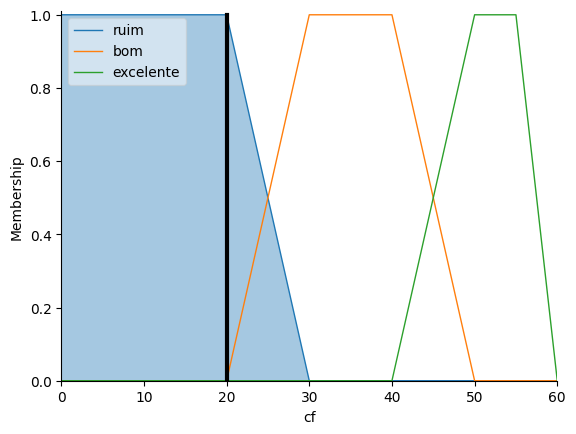

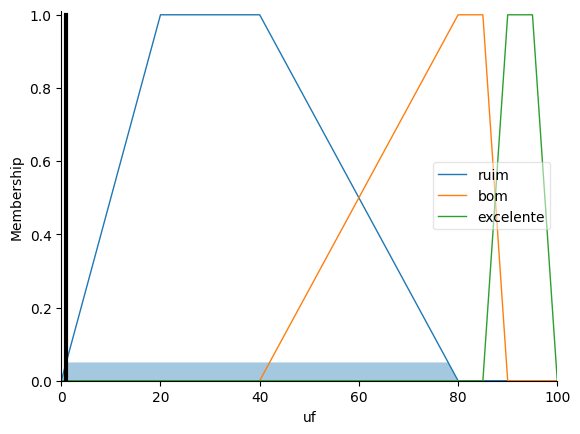

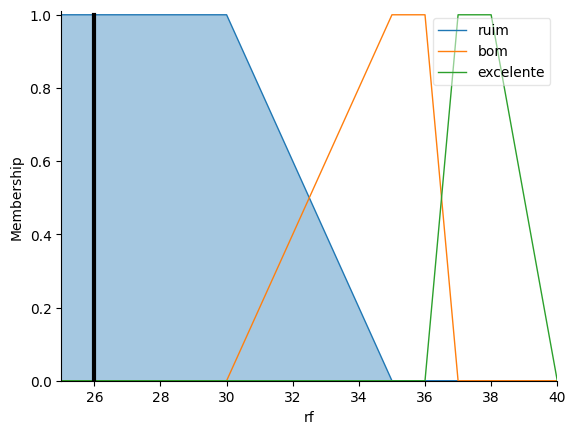

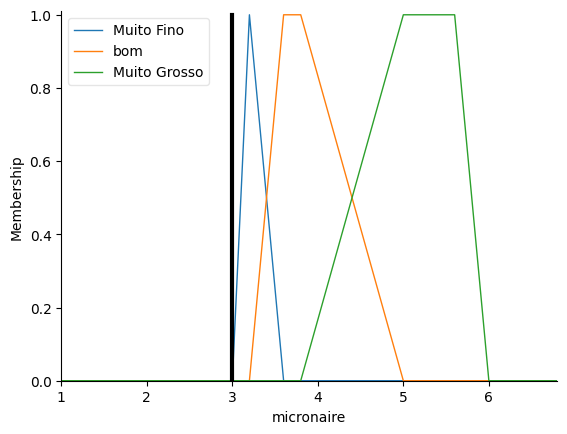

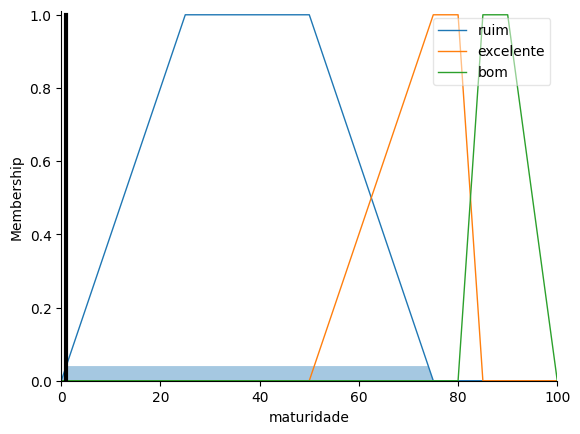

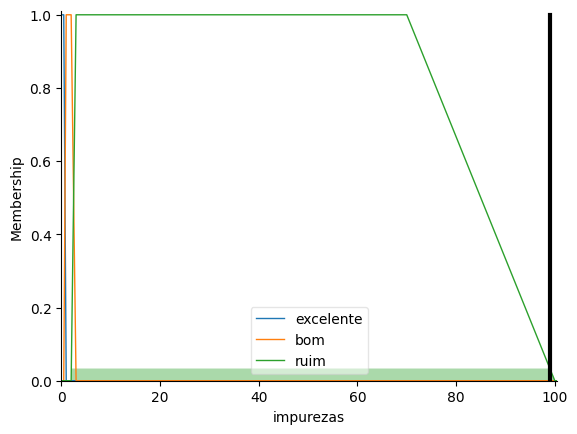

In [13]:
 # Plotando os gráficos
comprimentodasfibras.view(simulador)
uniformidadedasfibras.view(simulador)
resistenciadasfibras.view(simulador)
micronaire.view(simulador)
maturidade.view(simulador)
impurezas.view(simulador)

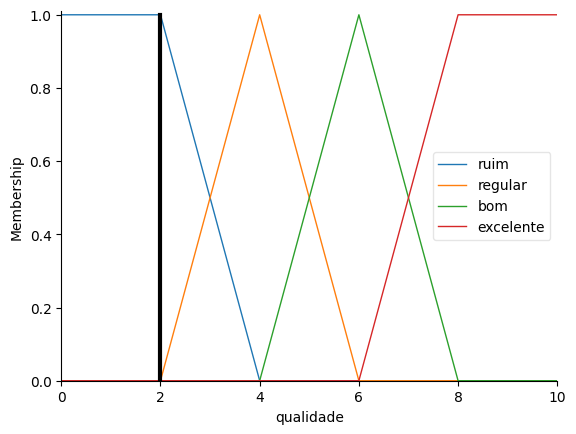

In [14]:
#Qualidade do produto
qualidade.view(simulador)